# Pandas Test - Real life Exercise

In [4]:
import pandas as pd

For visualizations:

In [7]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [8]:
ad_recs_annotated = pd.read_csv('data/Final assigment/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
364582,2022-week_52,AD08F8VJQD,RelayFoods,IN,no,False,Qality,UserPopQ
238953,2021-week_49,AD00E89PL8,RelayFoods,JP,yes,NaN,Qality,DNNQ
201787,2021-week_47,AD00CJKQMX,iDreamsky Technology,DE,yes,NaN,Qality,DNNQ
372143,2022-week_52,AD09H6SK6C,Extreme DA,US,no,False,Yield,RuleBasedY
95988,2021-week_39,AD08D9F8PI,RelayFoods,JP,yes,NaN,Qality,DNNQ


In [189]:
most_pop_ad = ad_recs_annotated.ad_id.value_counts().idxmax()


In [190]:
q = f'ad_id == "{most_pop_ad}"'
q

'ad_id == "AD07PFFMP9"'

In [38]:
ad_recs_annotated.query("ad_id == 'AD09H6SK6C'& is_success=='no'")

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
372143,2022-week_52,AD09H6SK6C,Extreme DA,US,no,False,Yield,RuleBasedY


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

### Q1

In [49]:
#ADD YEAR 
type(ad_recs_annotated)
ad_recs_annotated['year']=ad_recs_annotated['week_id'].apply(lambda x: x.split('-')[0])
ad_recs_annotated

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021
...,...,...,...,...,...,...,...,...,...
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,yes,NaN,Yield,DNNY,2022
373784,2022-week_52,AD07C8XSMN,Fancy,US,yes,NaN,Qality,RNNQ,2022
373785,2022-week_52,AD096LRR88,Extreme DA,US,yes,NaN,Yield,DNNY,2022
373786,2022-week_52,AD08FWNFDO,RelayFoods,US,yes,NaN,Qality,DNNQ,2022


### Q2

In [149]:
#ad_recs_annotated['week']=
ad_recs_annotated['week']=ad_recs_annotated['week_id'].apply(lambda x: x.split('_')[1])
ad_recs_annotated['week']

0         33
1         33
2         33
3         33
4         33
          ..
373783    52
373784    52
373785    52
373786    52
373787    52
Name: week, Length: 373788, dtype: object

### Q3

In [79]:
ad_recs_annotated['success']=ad_recs_annotated['is_success'].apply(lambda x: 1 if x=='yes' else 0)
ad_recs_annotated['success']
ad_recs_annotated['is_success'].apply(lambda x:x is None)


0         False
1         False
2         False
3         False
4         False
          ...  
373783    False
373784    False
373785    False
373786    False
373787    False
Name: is_success, Length: 373788, dtype: bool

In [82]:
[x for x in ad_recs_annotated['is_sever'].value_counts().apply(lambda x:x is None) if x==True]

[]

In [72]:
ad_recs_annotated['is_success'].apply(lambda x: x.capitalize())

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
373783    Yes
373784    Yes
373785    Yes
373786    Yes
373787    Yes
Name: is_success, Length: 373788, dtype: object

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

### Q1

In [95]:
ad_recs_annotated.query("region =='US'").region.value_counts()
ad_recs_annotated.query("region =='US'").shape

(103846, 10)

### Q2

In [100]:
ad_recs_annotated.query("region =='US'&success==1").shape

(88918, 10)

### Q3

In [114]:
ad_recs_annotated.query("region =='US'&success==1")['week_id'].str.contains('week_52').value_counts()

False    85576
True      3342
Name: week_id, dtype: int64

### Q4

In [111]:
ad_recs_annotated.query("rec_provider =='DNNQ'|rec_provider=='RNNY'|rec_provider=='UserPopQ'").shape

(200093, 10)

### Q5

In [99]:
#DONT KNOW WHAT IS MEAN

(200093, 10)

### Q6

In [125]:
ad_recs_annotated.query("year=='2021'").shape

(271615, 10)

### Q7

In [168]:
ad_recs_annotated.query("'30' <= week <= '40'")['week'].value_counts().sort_index()

33    14356
34    14371
35    14373
36    14390
37    14392
38    14347
39    14416
40    14406
Name: week, dtype: int64

In [172]:
ad_recs_annotated.query("'30' <= week <= '40'")['week'].value_counts()

39    14416
40    14406
37    14392
36    14390
35    14373
34    14371
33    14356
38    14347
Name: week, dtype: int64

In [207]:
mostPopolarAdId = ad_recs_annotated['ad_id'].value_counts().sort_values(ascending=False).index[0]
mostPopolarAdId2 = ad_recs_annotated.ad_id.value_counts().idxmax()
print(mostPopolarAdId,mostPopolarAdId2)

AD07PFFMP9 AD07PFFMP9


In [211]:
ad_recs_annotated.query("ad_id=='AD07PFFMP9'") 
ad_recs_annotated.query("{0}=='{1}'".format('ad_id',mostPopolarAdId))

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,success,week
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,1,33
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,1,33
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ,2021,1,34
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ,2021,1,34
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ,2021,1,35
...,...,...,...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ,2022,1,52
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ,2022,1,52
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ,2022,1,52
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ,2022,1,52


### Least Popular Provider

In [216]:
leastPopular=ad_recs_annotated.ad_id.value_counts().idxmin()

In [217]:
ad_recs_annotated.query(f"ad_id=='{leastPopular}'")

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,success,week
251351,2021-week_50,AD08ZLWHHR,RelayFoods,IN,yes,NaN,Qality,UserPopQ,2021,1,50


### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


In [339]:
ad_recs_annotated.week.value_counts().sort_index().count()
ad_recs_annotated.week.nunique()

26

#### unique region

In [341]:
ad_recs_annotated.groupby('region').agg({'week':['value_counts']}).reset_index()

region week             
                value_counts
0       DE   06         2418
1       DE   48         2418
2       DE   51         2411
3       DE   39         2407
4       DE   50         2406
..     ...  ...          ...
124     US   35         3982
125     US   37         3980
126     US   03         3979
127     US   36         3978
128     US   33         3974

[129 rows x 3 columns]

#### 3) dont understand yet the question

In [292]:
ad_recs_annotated.groupby('region').agg({"is_success":['value_counts']})

is_success
                  value_counts
region is_success             
DE     yes               50624
       no                11553
GB     yes               69509
       no                13475
IN     yes               63355
       no                19799
JP     yes               31800
       no                 9827
US     yes               88918
       no                14928

In [294]:
ad_recs_annotated.agg({'is_sever':"isnull"}).value_counts().values[0]

304195

In [336]:
ad_recs_annotated.groupby('week').agg({'ad_id':'value_counts'})

def GetMostSentInGivenWeek(week_num):
    return ad_recs_annotated.query(f"week=='{week_num}'").agg({'ad_id':'value_counts'})
    

In [337]:
GetMostSentInGivenWeek(33)
#ad_recs_annotated.query(f"week=='{33}'")

,ad_id
AD07FM8DDG,8
AD08VLRZD,7
AD07PHPXHQ,6
AD079VP6DH,5
AD07880888,5
...,...
AD08M8HIMN,1
AD08F8P88Y,1
AD08P7NJNV,1
AD088WF878,1


In [338]:
ad_recs_annotated.groupby('ad_id').agg({'week':'value_counts'})

week
ad_id      week      
AD00000088 37       1
AD000000WF 03       1
AD00000876 34       1
AD00000888 02       1
           43       1
...               ...
AD98988898 05       1
           43       1
AD99798888 42       1
ADOO8X898E 41       1
           50       1

[358763 rows x 1 columns]

Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

### Compactization

* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [4]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

['2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv',
 '2021_33_GB_Yield_annotation_result.csv',
 '2021_33_GB__Sample.csv',
 '2021_33_IN_Qality_annotation_result.csv',
 '2021_33_IN_Yield_annotation_result.csv',
 '2021_33_IN__Sample.csv',
 '2021_33_JP_Qality_annotation_result.csv']

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

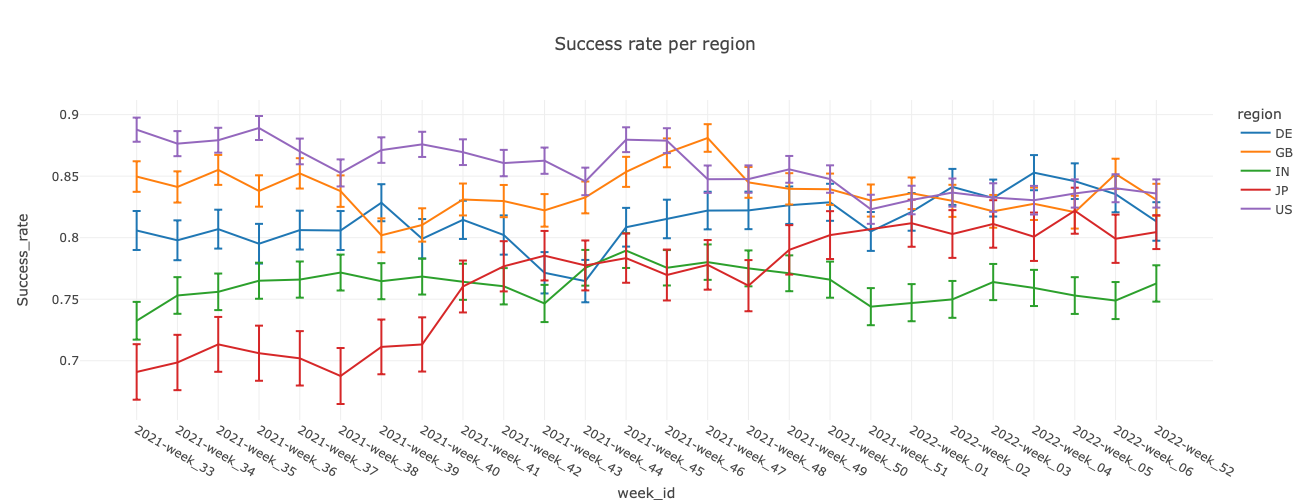

Produce the following requestser proportion graph:

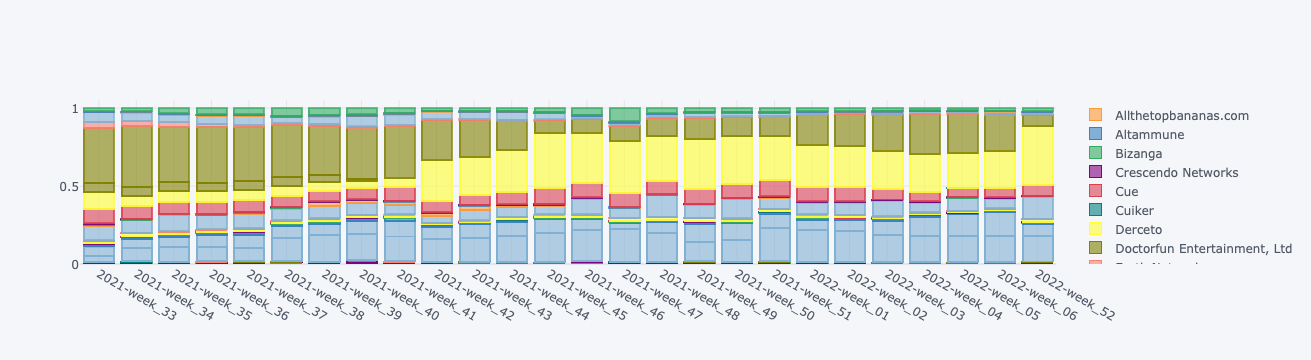

## Appendix

Code to create weekly files:

In [67]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)